## Machine Learning Performance Measure

# 1. Classification

In [1]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [4]:
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)
y_pred_proba_positive = pred_prob[:,1] # Estimated probabilities of positive samples
y_true = y_test

In [5]:
from sklearn.metrics import accuracy_score
CA=accuracy_score(y_true, pred)                        # Classification Accuracy
NCCS=accuracy_score(y_true, pred, normalize=False)     # Number of correctly classified samples

1. Accuracy

In [6]:
CA

0.6175

In [7]:
NCCS

247

2. Precision, Recall, dan F1-Score

In [8]:
labels = ["label1","label2","label3"]

In [9]:
print(classification_report(y_true, pred, target_names=labels))

              precision    recall  f1-score   support

      label1       0.62      0.71      0.66       133
      label2       0.45      0.29      0.36       130
      label3       0.70      0.84      0.76       137

    accuracy                           0.62       400
   macro avg       0.59      0.61      0.59       400
weighted avg       0.59      0.62      0.60       400



3. Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred, y_true)
cm

array([[ 94,  50,   7],
       [ 31,  38,  15],
       [  8,  42, 115]])

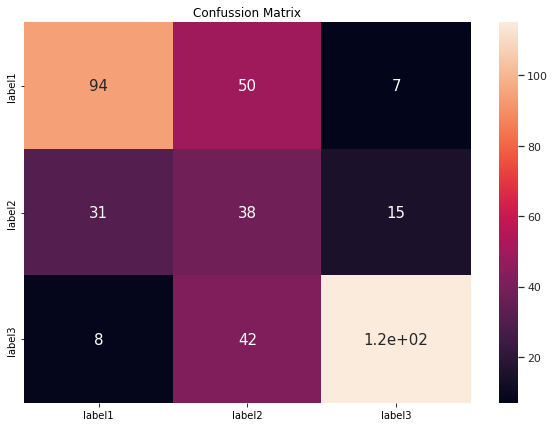

In [11]:
  import seaborn as sns

  #Visualisasi Confussion Matrix
  model_df_cm = pd.DataFrame(cm, labels, labels) 
  plt.figure(figsize = (10,7))
  plt.title('Confussion Matrix') 
  sns.set(font_scale=1) #for label size 
  sns.heatmap(model_df_cm, annot=True, annot_kws={"size": 15}) # font size 
  plt.show()

4. ROC-Curve

In [12]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

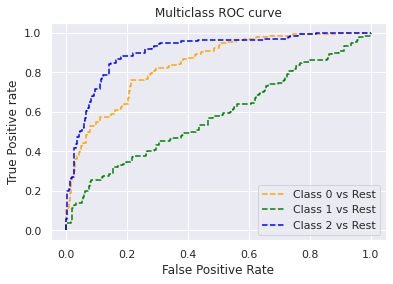

In [13]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

# 2. Regresi/Estimasi

In [14]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [15]:
data_1 = pd.DataFrame([[8, 7], [2, 3], [6, 7], [9, 10], [4, 2], [5, 6], [7, 8], [3, 3]])
data_1.columns = ['Kamera(x)', 'Harga(y)']
data_1

Kamera(x)  Harga(y)
0          8         7
1          2         3
2          6         7
3          9        10
4          4         2
5          5         6
6          7         8
7          3         3

In [16]:
X = data_1["Kamera(x)"].values[:, np.newaxis]
y = data_1["Harga(y)"].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2)

In [18]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_pred = lr.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.523809523809524


In [21]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.42871315192743753


In [22]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.6547619047619047


In [23]:
print("Log RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

Log RMSE -0.42348361361084286


In [24]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.0


In [25]:
n=40
k=2
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

-0.054054054054053946


# 3. Clustering

In [26]:
# Import data
df = pd.read_csv('/content/drive/MyDrive/dataset/Iris.csv')
#  Tampilkan 5 data pertama
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [27]:
# hapus atribut yang tidak digunakan
df.drop(['Species','Id'], axis=1, inplace=True)

# tampilkan 5 data pertama
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

In [28]:
from sklearn.preprocessing import StandardScaler

df_scale = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# instantiating the scaler
scaler = StandardScaler()

# fit and transform
df_scale = scaler.fit_transform(df_scale)
df_scale.shape

(150, 4)

In [29]:
df_scale[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [30]:
data = pd.DataFrame(df_scale)
data.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

data_cluster = data.copy()
data.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      -0.900681      1.032057      -1.341272     -1.312977
1      -1.143017     -0.124958      -1.341272     -1.312977
2      -1.385353      0.337848      -1.398138     -1.312977
3      -1.506521      0.106445      -1.284407     -1.312977
4      -1.021849      1.263460      -1.341272     -1.312977

In [31]:
data.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   1.500000e+02  1.500000e+02   1.500000e+02  1.500000e+02
mean   -2.775558e-16 -5.140333e-16   1.154632e-16  9.251859e-16
std     1.003350e+00  1.003350e+00   1.003350e+00  1.003350e+00
min    -1.870024e+00 -2.438987e+00  -1.568735e+00 -1.444450e+00
25%    -9.006812e-01 -5.877635e-01  -1.227541e+00 -1.181504e+00
50%    -5.250608e-02 -1.249576e-01   3.362659e-01  1.332259e-01
75%     6.745011e-01  5.692513e-01   7.627586e-01  7.905908e-01
max     2.492019e+00  3.114684e+00   1.786341e+00  1.710902e+00

In [32]:
# data = df.copy()
# data_cluster = df.copy()

1. Elbow Method

Text(0, 0.5, 'Inertia')

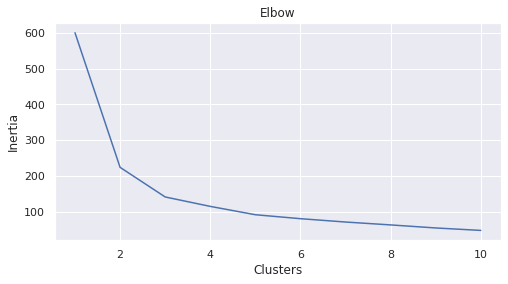

In [33]:
# Menentukan jumlah K
from sklearn.cluster import KMeans

# buat list inertia
clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

# tampilkan plot
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [34]:
## Melatih model
# Create Model
model_kmeans3 = KMeans(n_clusters=3)
model_kmeans4 = KMeans(n_clusters=4)

# Train Model
model_kmeans3.fit(data)
model_kmeans4.fit(data)

# Menambah Label pada data
data_cluster['cluster_kmeans3'] = model_kmeans3.labels_
data_cluster['cluster_kmeans4'] = model_kmeans4.labels_

data_cluster

SepalLengthCm  SepalWidthCm  ...  cluster_kmeans3  cluster_kmeans4
0        -0.900681      1.032057  ...                1                0
1        -1.143017     -0.124958  ...                1                3
2        -1.385353      0.337848  ...                1                3
3        -1.506521      0.106445  ...                1                3
4        -1.021849      1.263460  ...                1                0
..             ...           ...  ...              ...              ...
145       1.038005     -0.124958  ...                0                2
146       0.553333     -1.281972  ...                2                1
147       0.795669     -0.124958  ...                0                2
148       0.432165      0.800654  ...                0                2
149       0.068662     -0.124958  ...                2                1

[150 rows x 6 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


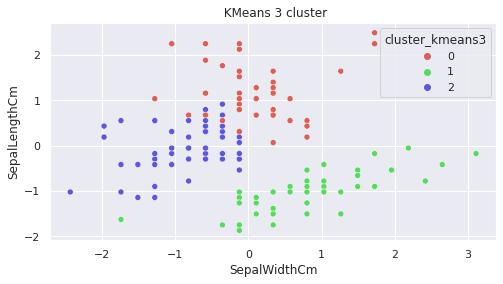

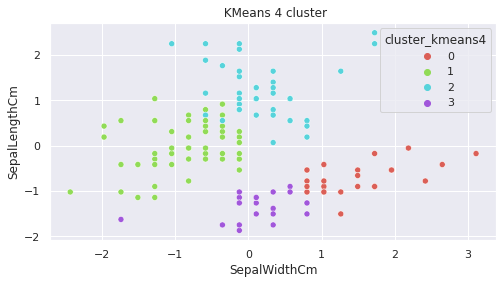

In [35]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['SepalWidthCm'], data_cluster['SepalLengthCm'], hue=data_cluster['cluster_kmeans3'], palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['SepalWidthCm'], data_cluster['SepalLengthCm'], hue=data_cluster['cluster_kmeans4'], palette=sns.color_palette('hls',4))
plt.title(' KMeans 4 cluster')
plt.show()

2. Silhouette Score

In [36]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 5):
    model2 = KMeans(n_clusters=k, random_state=42)
    model2.fit(X)
    score = silhouette_score(X, model2.labels_)
    print("Silhouette Score for k = ", k, "is", score)
    silhouette_scores.append(score)

Silhouette Score for k =  2 is 0.5397787397787398
Silhouette Score for k =  3 is 0.44479166666666664
Silhouette Score for k =  4 is 0.22916666666666666


In [37]:
plt.plot(range(2, 5), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.savefig('silhouette plot.png')